In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.dropna(axis=0,how='any',inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [4]:
columns = ['embarked','class','deck','embark_town','who','alive']
df=df.drop(columns,axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
1,1,1,female,38.0,1,0,71.2833,False,False
3,1,1,female,35.0,1,0,53.1000,False,False
6,0,1,male,54.0,0,0,51.8625,True,True
10,1,3,female,4.0,1,1,16.7000,False,False
11,1,1,female,58.0,0,0,26.5500,False,True
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,False,False
872,0,1,male,33.0,0,0,5.0000,True,True
879,1,1,female,56.0,0,1,83.1583,False,False
887,1,1,female,19.0,0,0,30.0000,False,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 9 columns):
survived      182 non-null int64
pclass        182 non-null int64
sex           182 non-null object
age           182 non-null float64
sibsp         182 non-null int64
parch         182 non-null int64
fare          182 non-null float64
adult_male    182 non-null bool
alone         182 non-null bool
dtypes: bool(2), float64(2), int64(4), object(1)
memory usage: 11.7+ KB


In [6]:
# convert categorical values to numeric values
df=pd.get_dummies(df,columns = ['sex','adult_male', 'alone'],drop_first=True)
df

,survived,pclass,age,sibsp,parch,fare,sex_male,adult_male_True,alone_True
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0
6,0,1,54.0,0,0,51.8625,1,1,1
10,1,3,4.0,1,1,16.7000,0,0,0
11,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,0
872,0,1,33.0,0,0,5.0000,1,1,1
879,1,1,56.0,0,1,83.1583,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [7]:
df

,survived,pclass,age,sibsp,parch,fare,sex_male,adult_male_True,alone_True
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0
6,0,1,54.0,0,0,51.8625,1,1,1
10,1,3,4.0,1,1,16.7000,0,0,0
11,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,0
872,0,1,33.0,0,0,5.0000,1,1,1
879,1,1,56.0,0,1,83.1583,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [8]:
# separate the X-axis, Y-axis
X = df.iloc[:,1:10]
X

,pclass,age,sibsp,parch,fare,sex_male,adult_male_True,alone_True
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,0
6,1,54.0,0,0,51.8625,1,1,1
10,3,4.0,1,1,16.7000,0,0,0
11,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,0
872,1,33.0,0,0,5.0000,1,1,1
879,1,56.0,0,1,83.1583,0,0,0
887,1,19.0,0,0,30.0000,0,0,1


In [9]:
Y=df.iloc[:,0]
Y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [10]:
# convert X to numpy arrahy
X=X.values
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 1. 38.  1. ...  0.  0.  0.]
 [ 1. 35.  1. ...  0.  0.  0.]
 [ 1. 54.  0. ...  1.  1.  1.]
 ...
 [ 1. 56.  0. ...  0.  0.  0.]
 [ 1. 19.  0. ...  0.  0.  1.]
 [ 1. 26.  0. ...  1.  1.  1.]]


In [11]:
# convert Y to a numpy array
Y=Y.values
print(Y)
print(type(Y))

[1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1]
<class 'numpy.ndarray'>


In [12]:
# split the dataset into training set and testing set
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.15, random_state = 1)

In [13]:
print(XTrain)
print(XTrain.shape)

[[ 3. 29.  1. ...  0.  0.  0.]
 [ 1. 14.  1. ...  0.  0.  0.]
 [ 1. 36.  0. ...  1.  1.  1.]
 ...
 [ 1. 22.  0. ...  0.  0.  0.]
 [ 1. 49.  1. ...  1.  1.  0.]
 [ 1. 32.  0. ...  0.  0.  1.]]
(154, 8)


In [14]:
XTrain=XTrain.T
print(XTrain.shape)

(8, 154)


In [15]:
XTest=XTest.T
print(XTest.shape)

(8, 28)


In [16]:
YTrain=YTrain.reshape(1,XTrain.shape[1])
print(YTrain.shape)

(1, 154)


In [17]:
YTest=YTest.reshape(1,XTest.shape[1])
print(YTest.shape)

(1, 28)


In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [32]:
def model(X,Y,learningrate,iterations):
    m=XTrain.shape[1]
    n=XTrain.shape[0]
    W=np.zeros((n,1))
    B=0
    cost_list=[]
    for i in range(iterations):
        Z=np.dot(W.T, X)+B
        A=sigmoid(Z)
        
        cost =-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        dW=(1/m)*np.dot(A-Y,X.T)
        dB=(1/m)*np.sum(A-Y)
        
        W = W-learningrate*dW.T
        B=B-learningrate*dB
        
        cost_list.append(cost)
        
        if(i%(iterations/10)==0):
            print("The cost after",i,"iteration is:",cost)
        
    return W,B,cost_list

In [50]:
iterations=1000
learningrate=0.000005
W,B,cost_list = model(XTrain,YTrain,learningrate=learningrate,iterations=iterations)

The cost after 0 iteration is: 0.6931471805599454
The cost after 100 iteration is: 0.6301723430106939
The cost after 200 iteration is: 0.6241066105671573
The cost after 300 iteration is: 0.6225798153946209
The cost after 400 iteration is: 0.621762517076397
The cost after 500 iteration is: 0.6211379862519265
The cost after 600 iteration is: 0.6206131258502969
The cost after 700 iteration is: 0.620162460742157
The cost after 800 iteration is: 0.6197733656867176
The cost after 900 iteration is: 0.6194366719459826


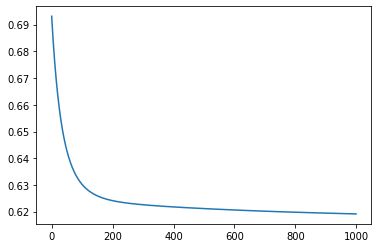

In [51]:
plt.plot(np.arange(iterations),cost_list)

In [ ]:
# find accuracy
def accuracy(X,Y,W,B):
    Z = np.dot(W.T, X)+B
    A=sigmoid(Z)
    A=A>0.5
    A=np.array(A, dtype='int64')
    acc=(1-np.sum(np.absolute(A-Y))/Y.shape[1]*100
    print('The accuracy of the model is :')